In [1]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql import SparkSession

sc = SparkContext()

spark = SparkSession.builder \
     .appName("Test SparkSession") \
     .getOrCreate()

In [2]:
#Reading in the data as a dataframe
citibike = spark.read.load("s3://502mashagubenko/502Project/FullCitibike")
capital = spark.read.load("s3://502mashagubenko/502Project/Capital")

In [3]:
# Number of stations for citibike
citibike.select("start_station_id").distinct().count()
citibike.select("end_station_id").distinct().count()

1135

In [8]:
# Number of stations for capital
capital.select("start_station_number").distinct().count()
capital.select("end_station_number").distinct().count()

581

In [3]:
citibike.printSchema()

root
 |-- tripduration: integer (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- start_station_id: integer (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: string (nullable = true)
 |-- start_station_longitude: string (nullable = true)
 |-- end_station_id: integer (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: string (nullable = true)
 |-- end_station_longitude: string (nullable = true)
 |-- bikeid: integer (nullable = true)
 |-- usertype: string (nullable = true)
 |-- birth_year: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- start_time: timestamp (nullable = true)
 |-- stop_time: timestamp (nullable = true)
 |-- dist: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- member: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)



In [8]:
capital.printSchema()

root
 |-- Duration: integer (nullable = true)
 |-- start_date: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- start_station_number: string (nullable = true)
 |-- start_station: string (nullable = true)
 |-- end_station_number: string (nullable = true)
 |-- end_station: string (nullable = true)
 |-- bike_number: string (nullable = true)
 |-- member_type: string (nullable = true)
 |-- start_lat: string (nullable = true)
 |-- start_long: string (nullable = true)
 |-- end_lat: string (nullable = true)
 |-- end_long: string (nullable = true)
 |-- dist: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- start_time: timestamp (nullable = true)
 |-- stop_time: timestamp (nullable = true)
 |-- day_of_week: integer (nullable = true)



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import seaborn as sns
from matplotlib import rcParams
import datetime as dt

# CITIBIKE ANALYSIS

In [5]:
#average of trip duration.
citibike = citibike.dropna(subset=['usertype'])
usert = pd.DataFrame()
usert = pd.DataFrame()
usert['averageduration'] = (citibike.groupby(['usertype', 'tripduration']).mean())
usert = usert.reset_index()


In [11]:
citibike.select("usertype").summary().show()

+-------+----------+
|summary|  usertype|
+-------+----------+
|  count| 147666495|
|   mean|      null|
| stddev|      null|
|    min|  Customer|
|    25%|      null|
|    50%|      null|
|    75%|      null|
|    max|Subscriber|
+-------+----------+



In [12]:
citibike.select("gender").summary().show()

+-------+------------------+
|summary|            gender|
+-------+------------------+
|  count|         147666495|
|   mean|1.1152346712096064|
| stddev|0.5588447342047681|
|    min|                 0|
|    25%|                 1|
|    50%|                 1|
|    75%|                 1|
|    max|                 2|
+-------+------------------+



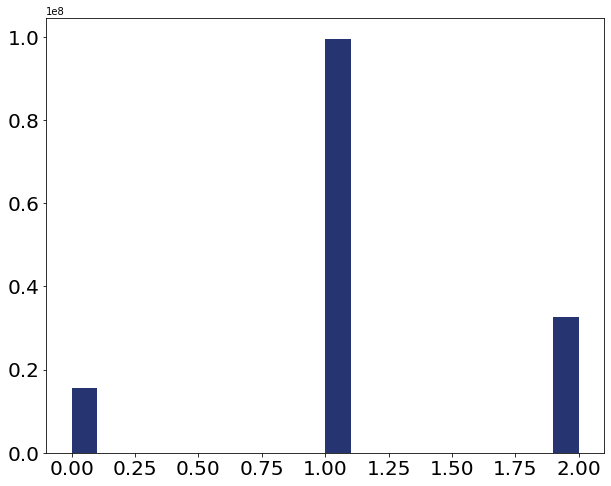

In [14]:
#Histogram of gender column
fig = plt.figure(figsize=(10, 8))
bins, counts = citibike.select('gender').rdd.flatMap(lambda x: x).histogram(20)
plt.hist(bins[:-1], bins=bins, weights=counts, color = '#263572')
plt.xticks(size = 20)
plt.yticks(size = 20)
fig.savefig("citibike_gender.png", bbox_inches='tight')

In [9]:
citibike.groupBy('gender').count().show()
citibike.groupBy('gender').mean().show()

+------+--------+
|gender|   count|
+------+--------+
|     1|99588283|
|     2|32547256|
|     0|15530956|
+------+--------+

+------+-----------------+---------------------+-------------------+------------------+------------------+-----------+------------------+------------------+-----------------+-------------------+-----------------+
|gender|avg(tripduration)|avg(start_station_id)|avg(end_station_id)|       avg(bikeid)|   avg(birth_year)|avg(gender)|         avg(dist)|        avg(speed)|         avg(age)|        avg(member)| avg(day_of_week)|
+------+-----------------+---------------------+-------------------+------------------+------------------+-----------+------------------+------------------+-----------------+-------------------+-----------------+
|     1|811.6216176756457|   1112.0021115027914| 1111.7696339624822| 23462.00536185567|1978.0281872196304|        1.0|1.0928568224370119| 5.918820663780033|41.97181278036971| 0.9786850527385837|4.035743886973458|
|     2| 966.84124114

In [10]:
citibike.select("age").summary('mean').show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|   mean|41.83112246499384|
+-------+-----------------+

